## Import necessary libraries, load the dataset, select relevant features and target vaiable.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Load the dataset
data = sns.load_dataset('titanic')

In [ ]:
# Select relevant features and target variable
features = data[['age', 'fare', 'embarked', 'sex']]
target = data['survived']

## Split the data into training and testing sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Define preprocessing steps for both numerical and categorical features.
Numeric Transformer:
- Numeric Transformer with Min-Max Scaling:
  SimpleImputer to fill missing values with the mean.
  MinMaxScaler to scale features to the range [0, 1].

- Numeric Transformer with Standard Scaling:
SimpleImputer to fill missing values with the mean.
StandardScaler to standardize features (mean 0, variance 1).


Categorical Transformer:
- SimpleImputer to fill missing categorical values with the most frequent value.

OneHotEncoder to convert categorical features into binary (0 or 1) columns.

**Complete code in the relevant places (40 min)**

In [ ]:
# Define preprocessing for numerical and categorical features
numeric_features = ...
categorical_features = ...

In [ ]:
# Imputation transformer for completing missing values
numeric_transformer_minmax = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

numeric_transformer_standard = ...

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Define the preprocessors
preprocessor_minmax = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_minmax, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessor_standard = ...

# Fit and transform the training data using Min-Max scaling
X_train_transformed_minmax = preprocessor_minmax.fit_transform(X_train)

# Fit and transform the training data using Standard scaling
X_train_transformed_standard = ...

Visualize Data Before and After Normalization

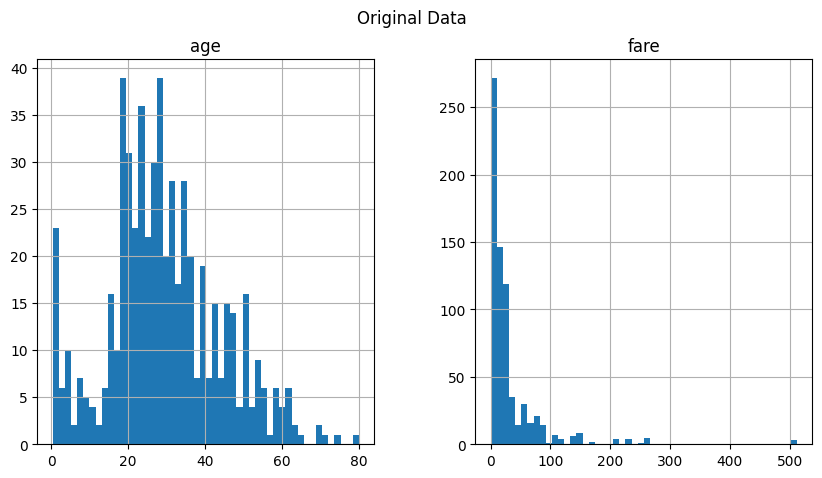

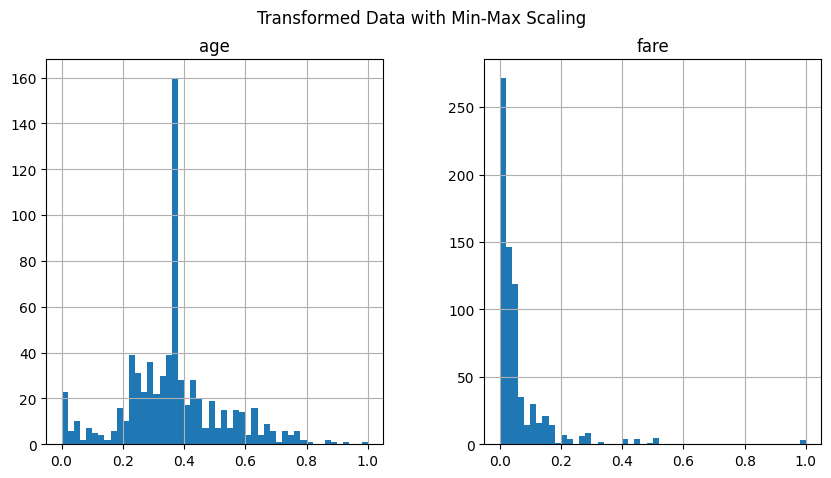

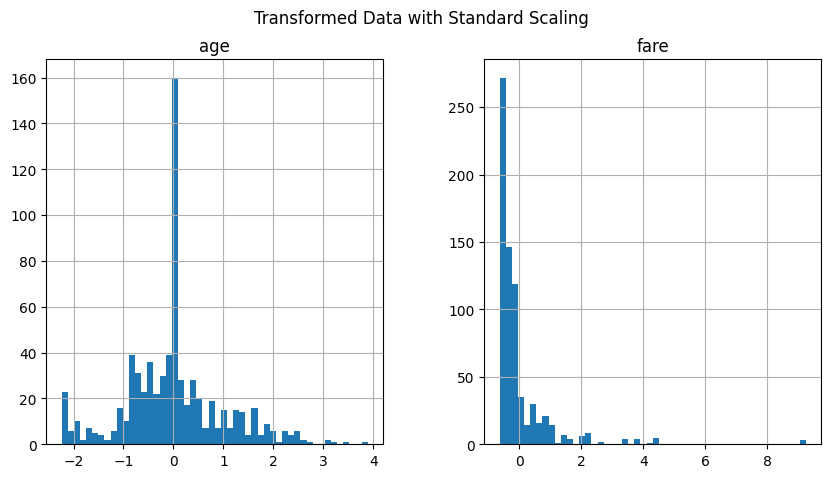

In [ ]:
# Visualize the data before and after normalization
def plot_histograms(data, title):
    data.hist(bins=50, figsize=(10, 5))
    plt.suptitle(title)
    plt.show()

# Plot original data
plot_histograms(X_train[numeric_features], "Original Data")

# Convert transformed data to DataFrame for visualization
X_train_transformed_minmax_df = pd.DataFrame(X_train_transformed_minmax, columns=numeric_features + list(preprocessor_minmax.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()))
plot_histograms(X_train_transformed_minmax_df[numeric_features], "Transformed Data with Min-Max Scaling")

X_train_transformed_standard_df = pd.DataFrame(X_train_transformed_standard, columns=numeric_features + list(preprocessor_standard.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()))
plot_histograms(X_train_transformed_standard_df[numeric_features], "Transformed Data with Standard Scaling")

**Complete code in the relevant places (10 min)**

Print Transformed Data (train + test)

In [ ]:
print("Transformed Data with Min-Max Scaling:")
print(X_train_transformed_minmax)

print("Transformed Data with Standard Scaling:")
print(X_train_transformed_standard)

# Transform the test data
X_test_transformed_minmax = ...
X_test_transformed_standard = ...
print(X_test_transformed_minmax)
print(X_test_transformed_standard)


Transformed Data with Min-Max Scaling:
[[0.56647399 0.0556283  0.         ... 1.         0.         1.        ]
 [0.28373963 0.02537431 0.         ... 1.         0.         1.        ]
 [0.39683338 0.01546857 0.         ... 1.         0.         1.        ]
 ...
 [0.50992712 0.02753757 0.         ... 1.         0.         1.        ]
 [0.17064589 0.2342244  0.         ... 1.         1.         0.        ]
 [0.25860769 0.15085515 0.         ... 1.         0.         1.        ]]
Transformed Data with Standard Scaling:
[[ 1.2322632  -0.07868358  0.         ...  1.          0.
   1.        ]
 [-0.50048197 -0.37714494  0.         ...  1.          0.
   1.        ]
 [ 0.1926161  -0.47486697  0.         ...  1.          0.
   1.        ]
 ...
 [ 0.88571416 -0.35580399  0.         ...  1.          0.
   1.        ]
 [-1.19358003  1.68320121  0.         ...  1.          1.
   0.        ]
 [-0.65450376  0.86074761  0.         ...  1.          0.
   1.        ]]
[[0.36540395 0.02975782 1.       